# Mô hình CNN cho bài toán nhận dạng chữ số viết tay sử dụng MNIST dataset

In [1]:
# !pip install keras
# !pip install tensorflow


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [3]:
# Bộ dữ liệu MNIST bao gồm 60.000 ảnh chữ số viết tay -> 50000 cho bộ train, 10000 cho bộ test
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

11490434/11490434 [==============================] - 3s 0us/step
(50000, 28, 28)


In [4]:
# Do chúng ta sử dụng mô hình CNN2D để huấn luyện nên cần thiết phải định hình lại dữ liệu như sau
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile model, chỉ rõ hàm loss_function(hàm mất mát) nào được sử dụng, phương thức dùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
#  Thực hiện train model với data qua 10 epoch ( giá trị epoch ta có thể tự lựa chọn)
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 97s 61ms/step - loss: 0.2816 - accuracy: 0.9233 - val_loss: 0.0703 - val_accuracy: 0.9822
Epoch 2/10
1563/1563 [==============================] - 87s 55ms/step - loss: 0.0575 - accuracy: 0.9840 - val_loss: 0.0534 - val_accuracy: 0.9837
Epoch 3/10
1563/1563 [==============================] - 110s 70ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 4/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.0237 - accuracy: 0.9932 - val_loss: 0.0456 - val_accuracy: 0.9864
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.0158 - accuracy: 0.9959 - val_loss: 0.0392 - val_accuracy: 0.9882
Epoch 6/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.0106 - accuracy: 0.9971 - val_loss: 0.0369 - val_accuracy: 0.9881
Epoch 7/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.03

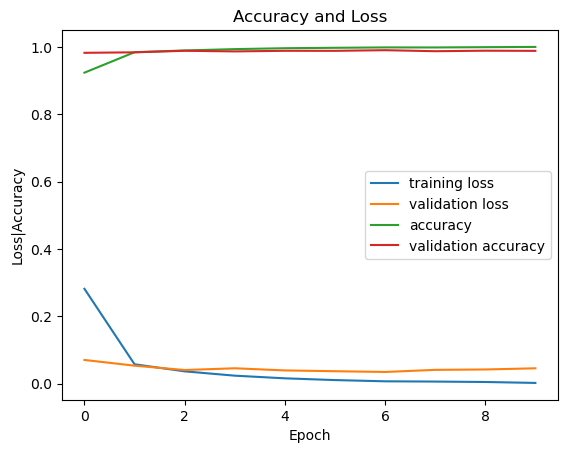

In [13]:
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend();

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03604675084352493, 0.9894999861717224]


1/1 [==============================] - 0s 106ms/step
Giá trị dự đoán:  7


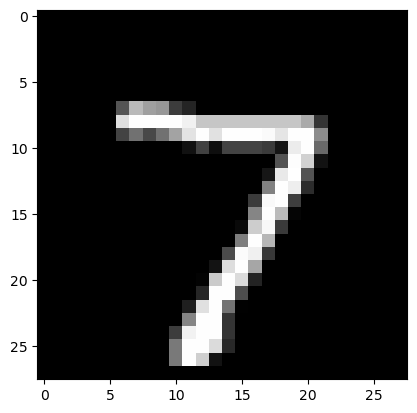

In [14]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict));

1/1 [==============================] - 0s 14ms/step
Giá trị dự đoán:  4


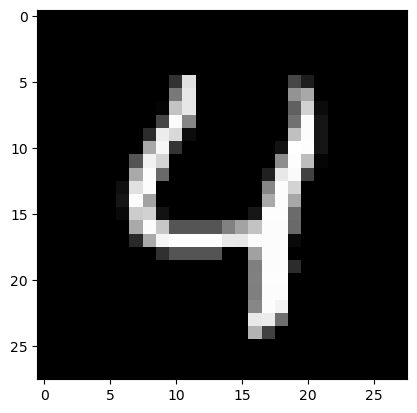

In [12]:
plt.imshow(X_test[4].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[4].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))